# Gamma Distributions

In [1]:
try:
    import jax
except:
    %pip install jax jaxlib
    import jax
import jax.numpy as jnp
from jax.scipy.stats import gamma

try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns

In [2]:
import os

LATEXIFY = "LATEXIFY" in os.environ

if LATEXIFY:
    import sys

    sys.path.append("scripts")  # Don't change to "../scripts", instead, run this nb from repo's root with ipython
    try:
      from plot_utils import latexify, savefig
    except:
      sys.path.append("scripts")
      from plot_utils import latexify, savefig

    latexify(width_scale_factor=2,fig_height=1.5)

In [ ]:
LEGEND_SIZE = 5 if LATEXIFY else None

In [3]:
def make_graph(data):
    x= data["x"]
    a_list = data["aa"]
    b_list= data["bb"]
    props = data["props"]
    fig_name = data["fig_name"]

    for a,b,p in zip(a_list,b_list,props):
      y = gamma.pdf(x,a,scale=1/b, loc=0)
      plt.plot(x,y,p, lw=2,label='a=%.1f,b=%.1f' % (a, b))

      plt.xlabel("$x$")
      plt.ylabel("$pdf$")
      plt.legend(loc="upper right", prop={"size": LEGEND_SIZE})
      plt.title(fig_name)
      sns.despine()

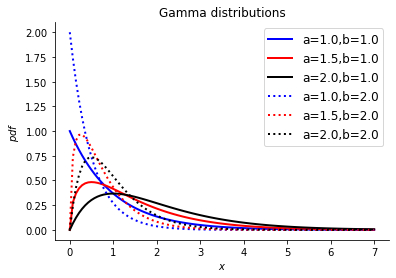

In [4]:
x = jnp.linspace(0, 7, 100)
aa = [1.0, 1.5, 2.0, 1.0, 1.5, 2.0]
bb = [1.0, 1.0, 1.0, 2.0, 2.0, 2.0]
props = ["b-", "r-", "k-", "b:", "r:", "k:"]
data = {"x":x, "aa":aa, "bb":bb, "props":props,"fig_name":'Gamma distributions'}
make_graph(data)
if LATEXIFY:
    savefig('gammadist_latexified.pdf')

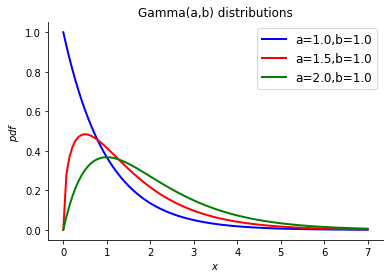

In [19]:
x = jnp.linspace(0,7,100)
aa= [1,1.5,2]
bb= [1,1,1]
props = ["b-", "r-", "g-"]
data = {"x":x, "aa":aa, "bb":bb, "props":props,"fig_name":'Gamma(a,b) distributions'}
make_graph(data)

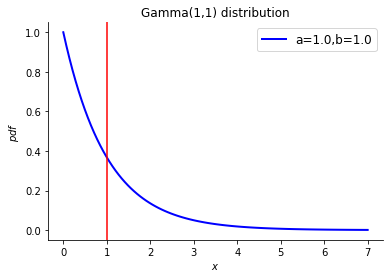

In [23]:
x = jnp.linspace(0, 7, 100)
bb = [1]
aa = [1]
props = ['b-']
data = {"x":x, "aa":aa, "bb":bb, "props":props,"fig_name":'Gamma(1,1) distribution'}
make_graph(data)
plt.axvline(1, color="r")
plt.show()

In [13]:
from ipywidgets import interact

@interact(a=(0.1, 5), b=(0.1, 5))
def generate_random(a,b):
    data= {"x": jnp.linspace(0, 7, 100), "aa":[a],"bb":[b],'props':['b'],'fig_name':'Gamma distributions'}
    make_graph(data)
    plt.yticks(jnp.arange(0, 6, step=1))

interactive(children=(FloatSlider(value=2.5500000000000003, description='a', max=5.0, min=0.1), FloatSlider(va…